Stock Market Prediction Techniques: A Review Paper https://www.researchgate.net/publication/372296944_Techniques_for_Stock_Market_Prediction_A_Review

Enhancing Stock Market Prediction Through LSTM Modeling and Analysis https://eudl.eu/pdf/10.4108/eai.2-6-2023.2334692

Stock Price Prediction with Long-short Term Memory Model https://ieeexplore.ieee.org/document/9731005

Impact of Data Normalization on Stock Index Forecasting https://www.mirlabs.org/ijcisim/regular_papers_2014/IJCISIM_24.pdf

Exploiting noisy data normalization for stock market prediction https://www.researchgate.net/publication/316635771_Exploiting_noisy_data_normalization_for_stock_market_prediction

Abstract -> Introduction 

-> method and technique for reduced noise and enhance prediction
 
compare 

LSTM model

result

conclusion 

refference 

EMA
SMA
Exponentially smoothed 
kalman filter Estimate

In [1]:
import yfinance as yf
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import median_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, Normalizer, MaxAbsScaler, PowerTransformer, Binarizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


dataset = yf.download('meta', start='2022-01-01',
                      end=datetime.now().strftime('%Y-%m-%d'),
                      progress=False,
                      period="ytd")
dataset = dataset.reset_index()
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.index = range(len(dataset))
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,338.299988,341.079987,337.190002,338.540009,337.845734,14537900
1,2022-01-04,339.950012,343.089996,331.869995,336.529999,335.839874,15998000
2,2022-01-05,333.019989,335.760010,323.839996,324.170013,323.505219,20564500
3,2022-01-06,322.820007,339.170013,322.720001,332.459991,331.778229,27962800
4,2022-01-07,332.739990,337.000000,328.880005,331.790009,331.109619,14722000


In [2]:


sma_10 = dataset['Adj Close'].rolling(window=20).mean()
ema_10 = dataset['Adj Close'].ewm(span=20, adjust=False).mean()
# Kalman Filter (assumes constant level with Gaussian noise)
Q = 0.01
R = 1  # Measurement noise covariance (adjust for noise level)
P = 1  # Initial state covariance
xhat = np.zeros_like(dataset['Close'])  # Kalman filter state estimate (level)
xhat[0] = dataset['Close'][0]
for i in range(1, len(dataset['Close'])):
    # Predict
    xhat_pred = xhat[i-1]
    Phat_pred = P + Q

    # Update
    K = Phat_pred / (Phat_pred + R)
    xhat[i] = xhat_pred + K * (dataset['Close'][i] - xhat_pred)
    P = (1 - K) * Phat_pred

data = dataset.filter(['Close'])
#training_data_len = int(np.ceil(len(data.values) * .95))
training_data_len = int(np.ceil(len(data.values)) * .85)
print(data)
print(training_data_len)

data1 = dataset.filter(['Close']).ewm(span=20, adjust=False).mean()

# training_data_len = int(np.ceil(len(data.values) * .95))
training_data_len1 = int(np.ceil(len(data1.values)) * .85)

          Close
0    338.540009
1    336.529999
2    324.170013
3    332.459991
4    331.790009
..          ...
629  529.320007
630  530.000000
631  534.690002
632  512.700012
633  498.869995

[634 rows x 1 columns]
538


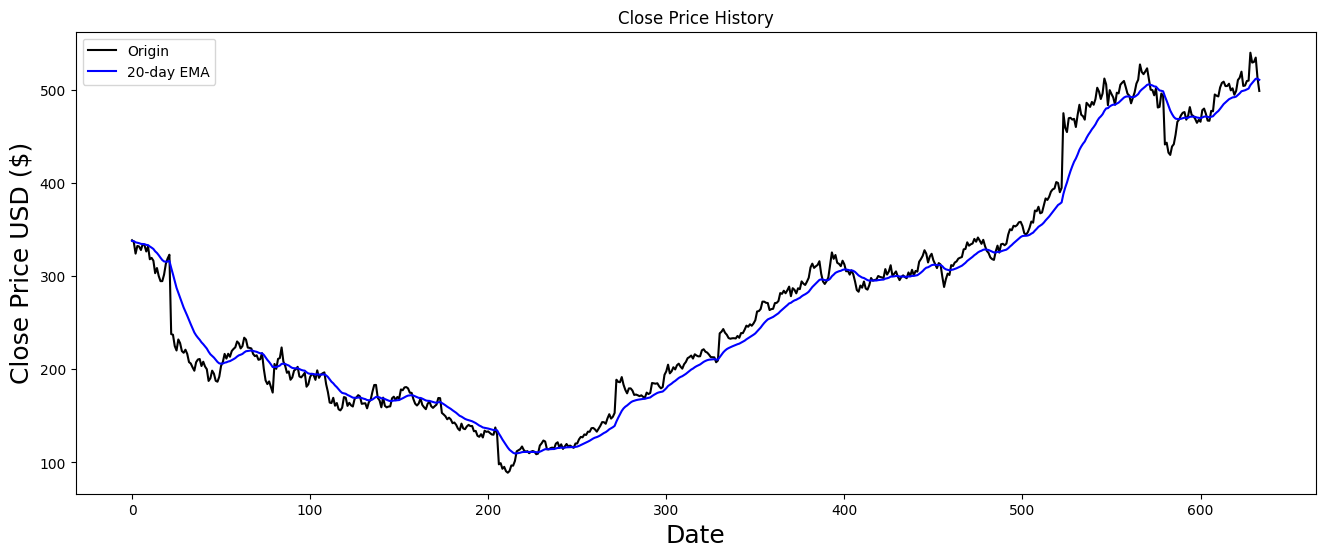

In [3]:

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(dataset['Close'], label='Origin', color='black')
plt.plot(ema_10, label='20-day EMA', color='blue')
#plt.plot(xhat, label='Kalman Filter Estimate', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

Scaling to a range
1.Min-Max Normalization (done)
2.Max Abs Scaling (done)
3.Hyperbolic Tangent(Tanh)

Scaling to a Distributin
1.Z-Score Normalization(Standardization)(done)
2.Robust Scaler (done)
3.Quantile Transformation (done)

Scaling to a Shape
1.Logarithmic transformation (done)
2.Square Root Transformation (done)
3.Square Transformation
4.Exponential Transformation

Parametric Scaling
1.Power Transformation(Box-Cox) (done)
2.Yeo-Johnson Transformations

VertorNorm
1.L1
2.L2

Miscellaneous
1.Decimal Scaling
2.Winsorization


https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1

https://www.geeksforgeeks.org/data-normalization-in-data-mining/

16 Data Normalization Methods Using Python (With Examples) — Part 1 of 6
https://medium.com/@reinapeh/16-data-feature-normalization-methods-using-python-with-examples-part-1-of-3-26578b2b8ba6

In [4]:
#scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, Normalizer, MaxAbsScaler, PowerTransformer, Binarizer

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

print("Scaler Min-Max", scaler)
print("Min-Max", scaled_data)

Scaler Min-Max MinMaxScaler()
Min-Max [[0.55350337]
 [0.54904659]
 [0.52164086]
 [0.54002218]
 [0.53853663]
 [0.53028829]
 [0.54425722]
 [0.54179606]
 [0.5267628 ]
 [0.5387805 ]
 [0.5082927 ]
 [0.51148561]
 [0.5047672 ]
 [0.47507766]
 [0.48736142]
 [0.46838138]
 [0.45614194]
 [0.45616414]
 [0.47184036]
 [0.49745016]
 [0.51017741]
 [0.51904659]
 [0.33004435]
 [0.32855876]
 [0.30155213]
 [0.2910643 ]
 [0.31727274]
 [0.30855879]
 [0.28966742]
 [0.28556541]
 [0.2928825 ]
 [0.28299334]
 [0.26341466]
 [0.25997784]
 [0.25093128]
 [0.24288248]
 [0.26317075]
 [0.26955654]
 [0.27077606]
 [0.25405767]
 [0.26430156]
 [0.25290467]
 [0.24645233]
 [0.21853659]
 [0.22478935]
 [0.24299336]
 [0.23569847]
 [0.21884701]
 [0.21667408]
 [0.22864745]
 [0.25436809]
 [0.26370288]
 [0.28288251]
 [0.27179603]
 [0.28323725]
 [0.27616411]
 [0.28971178]
 [0.29470069]
 [0.29862528]
 [0.31252773]
 [0.30807098]
 [0.29589802]
 [0.30141909]
 [0.32146343]
 [0.31691797]
 [0.29798228]
 [0.29720621]
 [0.2958315 ]
 [0.282815

In [5]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print(i)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.55350337, 0.54904659, 0.52164086, 0.54002218, 0.53853663,
       0.53028829, 0.54425722, 0.54179606, 0.5267628 , 0.5387805 ,
       0.5082927 , 0.51148561, 0.5047672 , 0.47507766, 0.48736142,
       0.46838138, 0.45614194, 0.45616414, 0.47184036, 0.49745016,
       0.51017741, 0.51904659, 0.33004435, 0.32855876, 0.30155213,
       0.2910643 , 0.31727274, 0.30855879, 0.28966742, 0.28556541,
       0.2928825 , 0.28299334, 0.26341466, 0.25997784, 0.25093128,
       0.24288248, 0.26317075, 0.26955654, 0.27077606, 0.25405767,
       0.26430156, 0.25290467, 0.24645233, 0.21853659, 0.22478935,
       0.24299336, 0.23569847, 0.21884701, 0.21667408, 0.22864745,
       0.25436809, 0.26370288, 0.28288251, 0.27179603, 0.28323725,
       0.27616411, 0.28971178, 0.29470069, 0.29862528, 0.31252773])]
[0.3080709796962005]
60

[array([0.55350337, 0.54904659, 0.52164086, 0.54002218, 0.53853663,
       0.53028829, 0.54425722, 0.54179606, 0.5267628 , 0.5387805 ,
       0.5082927 , 0.51148561, 0.

Lstm model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=1)
#RMSE: 5.989546160938989
#Median Absolute Error (MAE): 3.715057373046875

#model.fit(x_train, y_train, epochs=5, batch_size=50)
#RMSE: 9.293033360524161
#Median Absolute Error (MAE): 4.8186492919921875



Epoch 1/2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0111
Epoch 2/2
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0038


In [7]:
from sklearn.metrics import median_absolute_error

test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = data.values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
medae = median_absolute_error(y_test, predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse}')
print(f'Median Absolute Error (MAE): {medae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
RMSE: 41.17593604700686
Median Absolute Error (MAE): 39.82221984863281


/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_70667/537430229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


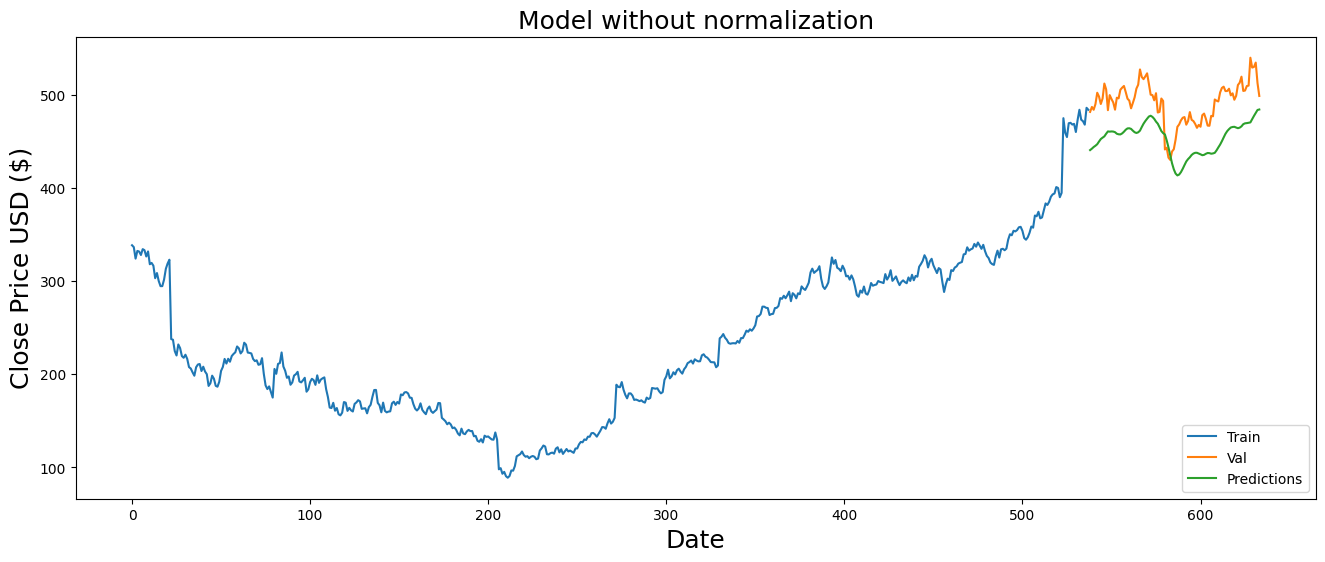

In [8]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model without normalization', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Experiment Zone 

In [9]:


all_predictions_list = []
def visualizeTrain(scaleable_type, xtrain, ytrain, model, training_data):
    # Create the training data set
    # Create the scaled training data set
    trained_data = scaleable_type[0:int(training_data), :]
    # Split the data into x_train and y_train data sets
    for i in range(60, len(trained_data)):
        xtrain.append(trained_data[i-60:i, 0])
        ytrain.append(trained_data[i, 0])
        if i <= 61:
            print(xtrain)
            print(ytrain)
            print(i)
            print()

    # Convert the x_train and y_train to numpy arrays
    xtrain, ytrain = np.array(xtrain), np.array(ytrain)

    # Reshape the data
    xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
    #model = Sequential()
    model.add(LSTM(128, return_sequences=True,
              input_shape=(xtrain.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    #model.add(Dense(25))
    model.add(Dense(50))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    #model.fit(xtrain, ytrain, epochs=2, batch_size=1)
    model.fit(xtrain, ytrain, epochs=5, batch_size=2, validation_split=0.2)
    
    
def Evaluation(scaleable_type, scaler, xtest, training_data, data, model):
    
    test_data = scaleable_type[training_data - 60:, :]
    # Create the data sets x_test and y_test

    ytest = data.values[training_data:, :]
    
    for i in range(60, len(test_data)):
        xtest.append(test_data[i-60:i, 0])

    # Convert the data to a numpy array
    xtest = np.array(xtest)

    # Reshape the data
    xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

    # Get the models predicted price values
    predicted = model.predict(xtest)
    predicted = scaler.inverse_transform(predicted)
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predicted - ytest) ** 2)))
    medae = median_absolute_error(ytest, predicted)
    r_squared = r2_score(ytest, predicted)

    print(f'RMSE: {rmse}')
    print(f'Median Absolute Error (MAE): {medae}')
    print(f"R-Squared: {r_squared}")
    
    train = data[:training_data]
    valid = data[training_data:].copy()
    valid['Predictions'] = predicted
    all_predictions_list.append(predicted)
    
    # Visualize the data
    plt.figure(figsize=(16, 6))
    plt.title('Model with normalization', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    

Scaling to a range

[array([0.55350337, 0.54904659, 0.52164086, 0.54002218, 0.53853663,
       0.53028829, 0.54425722, 0.54179606, 0.5267628 , 0.5387805 ,
       0.5082927 , 0.51148561, 0.5047672 , 0.47507766, 0.48736142,
       0.46838138, 0.45614194, 0.45616414, 0.47184036, 0.49745016,
       0.51017741, 0.51904659, 0.33004435, 0.32855876, 0.30155213,
       0.2910643 , 0.31727274, 0.30855879, 0.28966742, 0.28556541,
       0.2928825 , 0.28299334, 0.26341466, 0.25997784, 0.25093128,
       0.24288248, 0.26317075, 0.26955654, 0.27077606, 0.25405767,
       0.26430156, 0.25290467, 0.24645233, 0.21853659, 0.22478935,
       0.24299336, 0.23569847, 0.21884701, 0.21667408, 0.22864745,
       0.25436809, 0.26370288, 0.28288251, 0.27179603, 0.28323725,
       0.27616411, 0.28971178, 0.29470069, 0.29862528, 0.31252773])]
[0.3080709796962005]
60

[array([0.55350337, 0.54904659, 0.52164086, 0.54002218, 0.53853663,
       0.53028829, 0.54425722, 0.54179606, 0.5267628 , 0.5387805 ,
       0.5082927 , 0.51148561, 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0054 - val_loss: 0.0095
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0010 - val_loss: 0.0096
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 9.8585e-04 - val_loss: 0.0017
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.8132e-04 - val_loss: 7.8451e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 13.950263726594283
Median Absolute Error (MAE): 7.7250518798828125
R-Squared: 0.6053638028411634


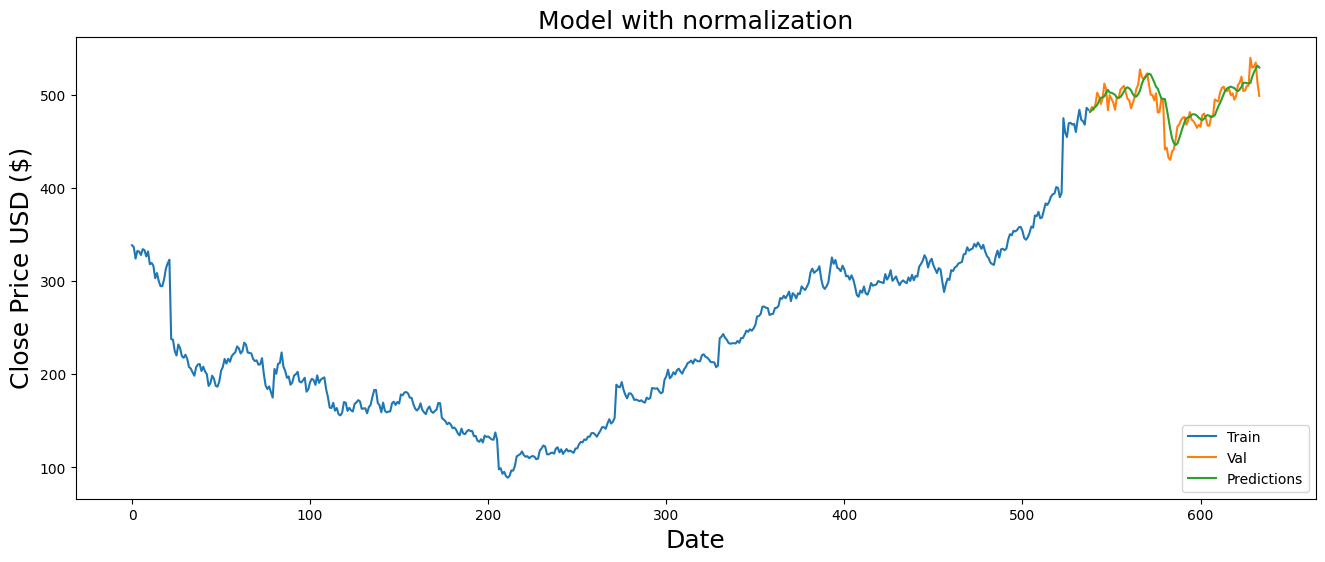

In [10]:
all_predictions_list.clear()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)
x_train_MinMax = []
y_train_MinMax = []
x_test_MinMax = []
modelMinMax1 = Sequential()

visualizeTrain(scaled_data, x_train_MinMax,
               y_train_MinMax, modelMinMax1, training_data_len)
Evaluation(scaled_data, scaler, xtest=x_test_MinMax,
           training_data=training_data_len, data=data, model=modelMinMax1)

[array([ 0.53679552,  0.52033075,  0.41908532,  0.48699174,  0.48150365,
        0.45103168,  0.50263732,  0.493545  ,  0.43800741,  0.48240459,
        0.36977301,  0.38156863,  0.35674873,  0.24706618,  0.29244629,
        0.22232803,  0.17711166,  0.17719366,  0.23510658,  0.32971725,
        0.37673574,  0.40950129, -0.28873263, -0.29422085, -0.39399189,
       -0.43273724, -0.33591498, -0.36810708, -0.43789773, -0.45305185,
       -0.42602025, -0.46255389, -0.53488373, -0.54758041, -0.58100128,
       -0.61073606, -0.53578479, -0.51219368, -0.50768839, -0.5694514 ,
       -0.53160723, -0.57371095, -0.59754792, -0.70067746, -0.67757781,
       -0.61032647, -0.63727608, -0.69953067, -0.7075582 , -0.66332475,
       -0.56830461, -0.53381894, -0.46296336, -0.5039203 , -0.46165283,
       -0.48778325, -0.43773387, -0.41930325, -0.40480458, -0.35344455])]
[-0.36990919043478154]
60

[array([ 0.53679552,  0.52033075,  0.41908532,  0.48699174,  0.48150365,
        0.45103168,  0.50263732, 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0467 - val_loss: 0.0261
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0063 - val_loss: 0.0324
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0072 - val_loss: 0.0381
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0078 - val_loss: 0.0226
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0048 - val_loss: 0.0202
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 30.110394531100546
Median Absolute Error (MAE): 27.67266845703125
R-Squared: -0.8385056704353759


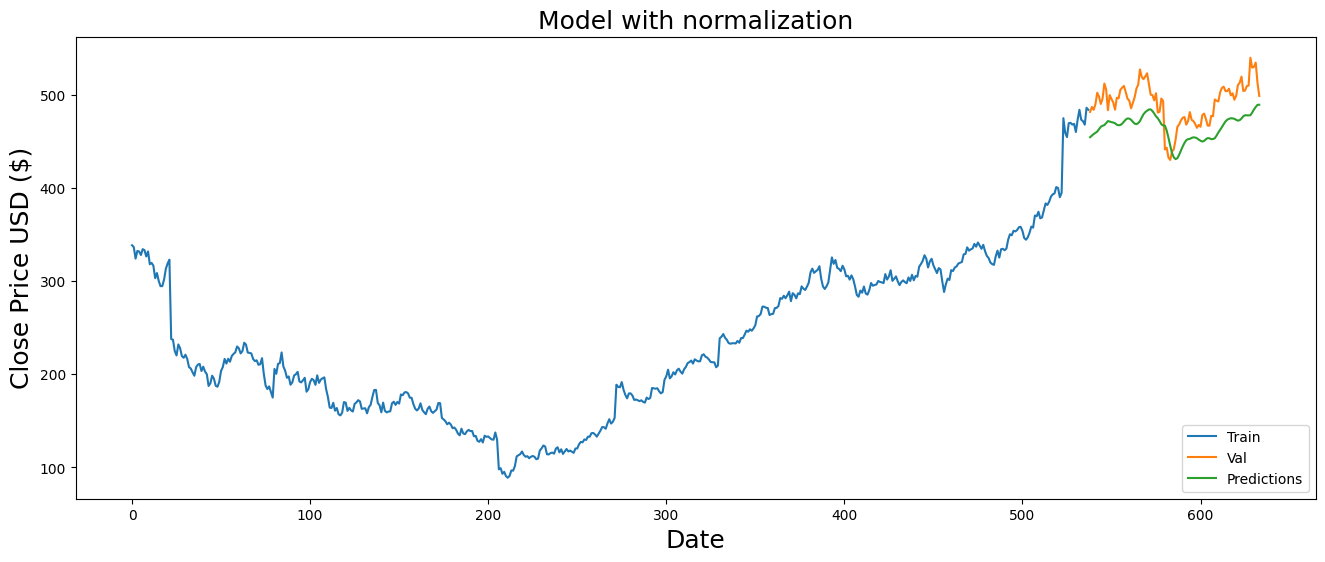

In [11]:
# Z-Score Normalization
scalerZScore = StandardScaler()
#scaled_Z_Score = scalerZScore.fit_transform(data.values)
scaled_Z_Score = scalerZScore.fit_transform(data.values.reshape(-1, 1))

x_train_Z = []
y_train_Z = []
x_test_Z = []
modelZ = Sequential()

visualizeTrain(scaled_Z_Score, x_train_Z, y_train_Z, modelZ, training_data_len)
Evaluation(scaled_Z_Score, scalerZScore, xtest=x_test_Z,training_data=training_data_len, data=data, model=modelZ)
#RMSE: 5.869824840358386
#Median Absolute Error (MAE): 2.579254150390625

[array([0.62703048, 0.62330762, 0.60041494, 0.61576931, 0.61452839,
       0.60763835, 0.61930694, 0.61725107, 0.60469343, 0.6147321 ,
       0.5892649 , 0.59193201, 0.58631997, 0.56151957, 0.57178049,
       0.555926  , 0.5457021 , 0.54572064, 0.55881537, 0.58020786,
       0.59083924, 0.59824789, 0.4403697 , 0.43912876, 0.41656946,
       0.40780872, 0.42970127, 0.42242229, 0.40664187, 0.40321537,
       0.4093275 , 0.40106685, 0.3847123 , 0.38184144, 0.37428462,
       0.36756127, 0.38450856, 0.38984276, 0.39086146, 0.37689618,
       0.38545315, 0.37593305, 0.37054325, 0.34722456, 0.35244764,
       0.36765389, 0.36156029, 0.34748386, 0.34566875, 0.3556704 ,
       0.37715548, 0.38495306, 0.40097427, 0.39171346, 0.40127059,
       0.39536222, 0.40667892, 0.41084629, 0.41412459, 0.42573765])]
[0.42201481253712886]
60

[array([0.62703048, 0.62330762, 0.60041494, 0.61576931, 0.61452839,
       0.60763835, 0.61930694, 0.61725107, 0.60469343, 0.6147321 ,
       0.5892649 , 0.59193201, 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0090 - val_loss: 0.0016
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 7.4821e-04 - val_loss: 0.0016
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.2337e-04 - val_loss: 0.0017
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.7970e-04 - val_loss: 7.5025e-04
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.0307e-04 - val_loss: 6.9556e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 14.957277444273473
Median Absolute Error (MAE): 8.625091552734375
R-Squared: 0.5463330093444907


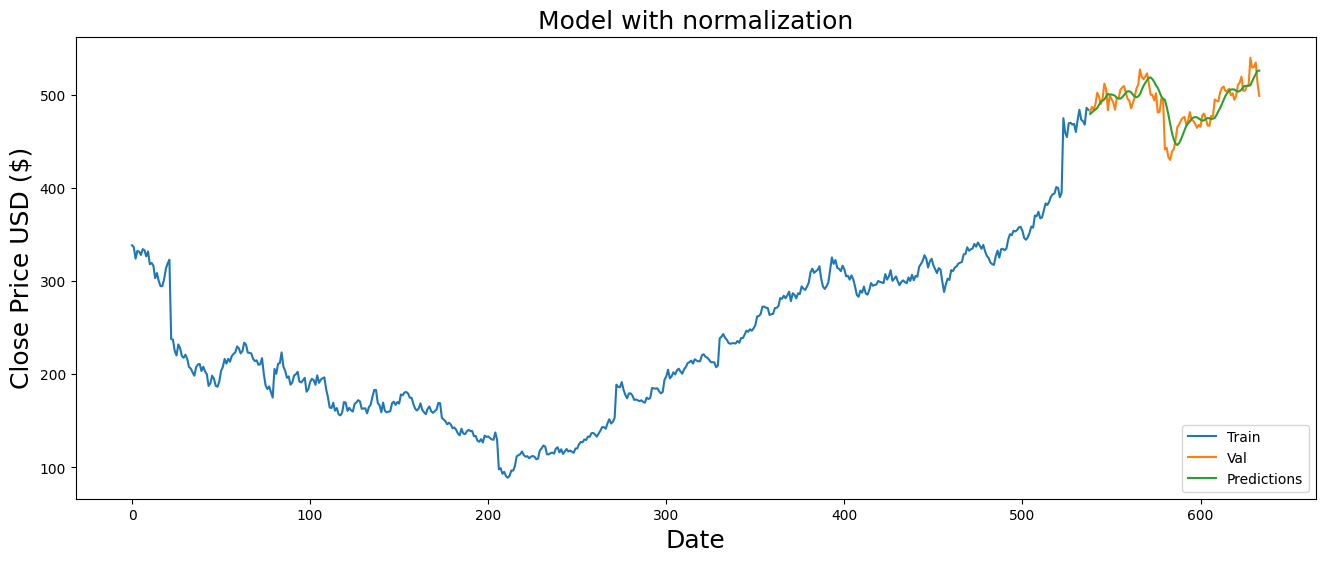

In [12]:
# Max Abs Scaling
scalerMaxAbs = MaxAbsScaler()
scaled_MaxAbs = scalerMaxAbs.fit_transform(data.values)

x_train_MaxAbs = []
y_train_MaxAbs = []
x_test_MaxAbs = []
modelMaxAbs = Sequential()

visualizeTrain(scaled_MaxAbs, x_train_MaxAbs,
               y_train_MaxAbs, modelMaxAbs, training_data_len)
Evaluation(scaled_MaxAbs, scalerMaxAbs, xtest=x_test_MaxAbs,
           training_data=training_data_len, data=data, model=modelMaxAbs)

[array([ 0.74191991,  0.72636583,  0.5933864 ,  0.66088076,  0.64617279,
        0.6316033 ,  0.6957716 ,  0.68071704,  0.61238304,  0.65105978,
        0.51940906,  0.54679705,  0.50361213,  0.34952093,  0.4005064 ,
        0.29322223,  0.21751874,  0.22157525,  0.32854973,  0.46134687,
        0.54220437,  0.57927851, -0.00593991, -0.00989996, -0.06935413,
       -0.11708455, -0.04951921, -0.06141732, -0.12506267, -0.13704496,
       -0.10911388, -0.14904695, -0.27055949, -0.28290301, -0.33692036,
       -0.37914343, -0.27466932, -0.24191405, -0.23376699, -0.31603661,
       -0.25825705, -0.32020205, -0.35373338, -0.50136574, -0.47460143,
       -0.37489183, -0.4177289 , -0.49688053, -0.51036663, -0.44817288,
       -0.31187663, -0.26440327, -0.1530523 , -0.22157525, -0.14504398,
       -0.19325221, -0.12107265, -0.10115014, -0.07729531, -0.0574504 ])]
[-0.0653852112708148]
60

[array([ 0.74191991,  0.72636583,  0.5933864 ,  0.66088076,  0.64617279,
        0.6316033 ,  0.6957716 ,  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (634). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1433 - val_loss: 0.0455
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0426 - val_loss: 0.0284
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0907 - val_loss: 0.0083
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0582 - val_loss: 0.0156
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0289 - val_loss: 0.0330
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 18.986058920035216
Median Absolute Error (MAE): 10.088119506835938
R-Squared: 0.26902633595627035


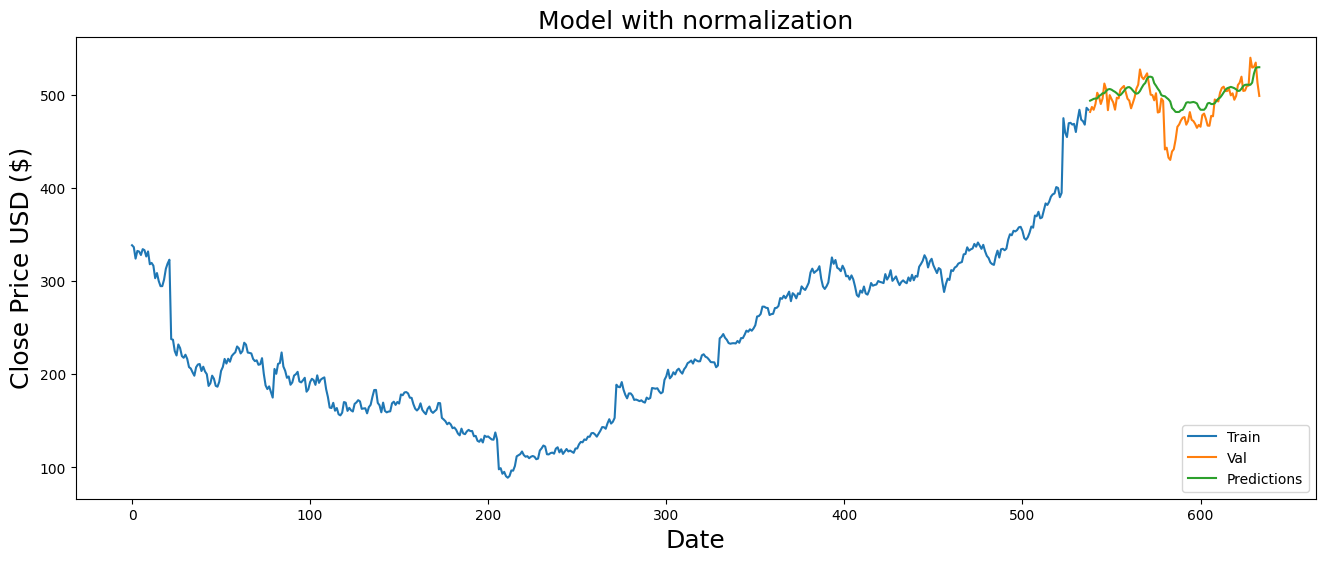

In [13]:
# quantile transformation
scalerQuantile = QuantileTransformer(output_distribution='normal')
scaled_quantile = scalerQuantile.fit_transform(data.values)

x_train_Quantile = []
y_train_Quantile = []
x_test_Quantile = []
modelQuantile = Sequential()

visualizeTrain(scaled_quantile, x_train_Quantile,
               y_train_Quantile, modelQuantile, training_data_len)
Evaluation(scaled_quantile, scalerQuantile, xtest=x_test_Quantile,
           training_data=training_data_len, data=data, model=modelQuantile)

[array([ 0.62616601,  0.61356111,  0.53605082,  0.58803782,  0.58383632,
        0.56050794,  0.60001558,  0.59305479,  0.55053697,  0.58452604,
        0.49829888,  0.50732923,  0.48832791,  0.40435843,  0.4391    ,
        0.38541968,  0.35080347,  0.35086624,  0.39520253,  0.46763346,
        0.50362932,  0.52871359, -0.00583214, -0.01003374, -0.08641529,
       -0.1160775 , -0.04195345, -0.06659869, -0.12002821, -0.13162972,
       -0.11093518, -0.13890418, -0.19427761, -0.20399778, -0.22958374,
       -0.25234774, -0.19496743, -0.17690682, -0.17345772, -0.22074152,
       -0.19176922, -0.2240025 , -0.24225132, -0.32120403, -0.30351967,
       -0.25203417, -0.27266594, -0.32032608, -0.3264717 , -0.29260798,
       -0.21986357, -0.19346244, -0.13921765, -0.17057299, -0.13821436,
       -0.15821898, -0.11990276, -0.10579286, -0.09469314, -0.05537353])]
[-0.06797833632492652]
60

[array([ 0.62616601,  0.61356111,  0.53605082,  0.58803782,  0.58383632,
        0.56050794,  0.60001558, 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0182 - val_loss: 0.0080
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0049 - val_loss: 0.0114
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0038 - val_loss: 0.0136
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0032 - val_loss: 0.0052
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
RMSE: 13.602463111571803
Median Absolute Error (MAE): 7.577850341796875
R-Squared: 0.6247962284505523


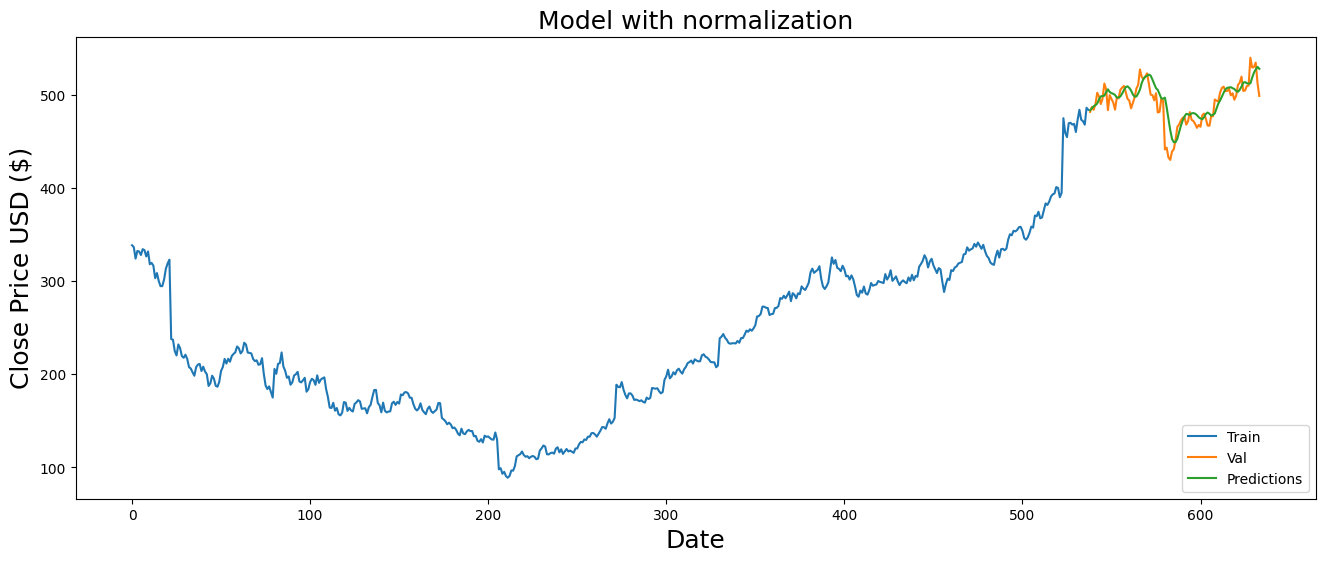

In [14]:
# Robust Scaler
scalerRobust = RobustScaler()
scaled_RobustScaler = scalerRobust.fit_transform(data.values)

x_train_Robust = []
y_train_Robust = []
x_test_Robust = []
modelRobust = Sequential()

visualizeTrain(scaled_RobustScaler, x_train_Robust,
               y_train_Robust, modelRobust, training_data_len)
Evaluation(scaled_RobustScaler, scalerRobust, xtest=x_test_Robust,
           training_data=training_data_len, data=data, model=modelRobust)

[array([ 0.69472309,  0.68146226,  0.59817777,  0.65437226,  0.64988182,
        0.62478698,  0.66712535,  0.65972267,  0.61397611,  0.65061958,
        0.55648383,  0.56652678,  0.54534308,  0.44929454,  0.48952644,
        0.42705949,  0.38584788,  0.38592329,  0.43857219,  0.52204537,
        0.56241735,  0.59013392, -0.08896795, -0.09519932, -0.21157817,
       -0.25843808, -0.14310786, -0.18080473, -0.26475329, -0.28340099,
       -0.2502444 , -0.29517258, -0.38684748, -0.40333109, -0.44730456,
       -0.48716172, -0.38801333, -0.35768625, -0.35194061, -0.43201073,
       -0.38261318, -0.43763898, -0.46939709, -0.61219628, -0.57941581,
       -0.48660788, -0.52334134, -0.61055758, -0.62205357, -0.55942477,
       -0.43049785, -0.38547055, -0.29568123, -0.34714631, -0.29405367,
       -0.32672886, -0.26455249, -0.24208032, -0.22455799, -0.16355701])]
[-0.18293369016234506]
60

[array([ 0.69472309,  0.68146226,  0.59817777,  0.65437226,  0.64988182,
        0.62478698,  0.66712535, 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1408 - val_loss: 0.0124
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0360 - val_loss: 0.0089
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0217 - val_loss: 0.0207
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0168 - val_loss: 0.0102
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0128 - val_loss: 0.0076
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 23.932376968675502
Median Absolute Error (MAE): 20.859222412109375
R-Squared: -0.16145864683141342


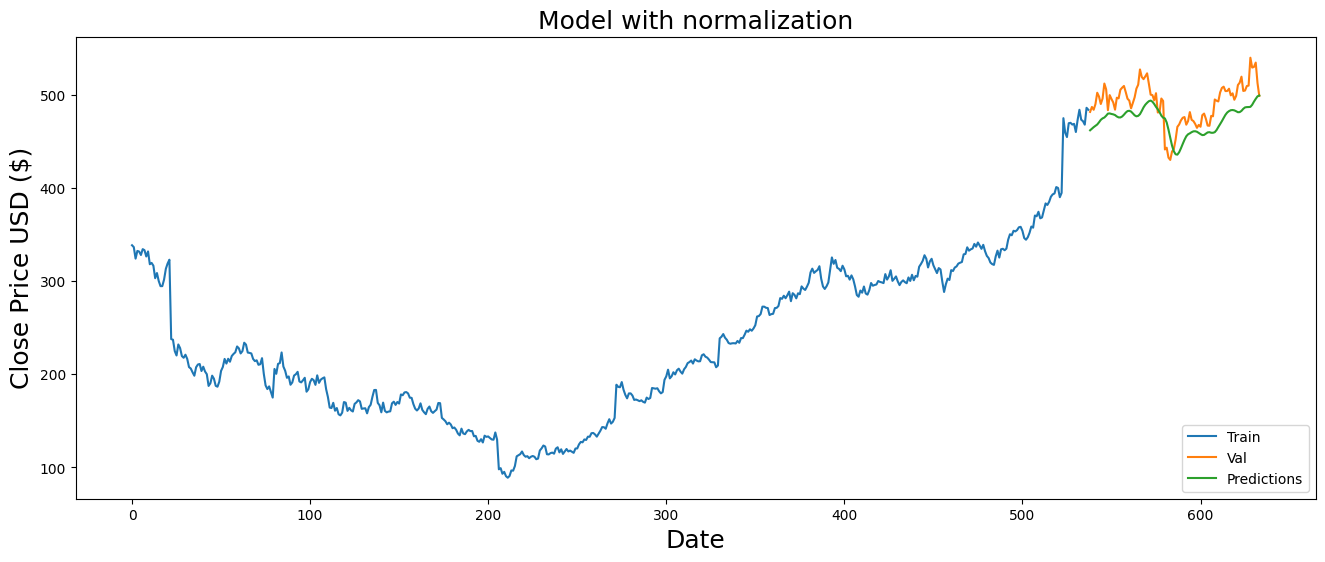

In [15]:
scalerPower = PowerTransformer(method='yeo-johnson')
scaled_power = scalerPower.fit_transform(data.values)

x_train_Power = []
y_train_Power = []
x_test_Power = []
modelPower = Sequential()

visualizeTrain(scaled_power, x_train_Power,
               y_train_Power, modelPower, training_data_len)
Evaluation(scaled_power, scalerPower, xtest=x_test_Power,
           training_data=training_data_len, data=data, model=modelPower)

In [16]:
l1_normalized = Normalizer(norm='l2')
scaled_L1 = l1_normalized.fit_transform(data.values)
#print(scaled_L1)
print("\nOriginal data:\n", data.head())
print("\nL1 Normalized data:\n", scaled_L1[:3])


Original data:
         Close
0  338.540009
1  336.529999
2  324.170013
3  332.459991
4  331.790009

L1 Normalized data:
 [[1.]
 [1.]
 [1.]]


In [17]:
# Square Root Transformation
data_sqrt = np.sqrt(data.values + np.abs(data.values.min()))
print(data_sqrt)

[[20.67486426]
 [20.62619699]
 [20.32437003]
 [20.52729878]
 [20.51097297]
 [20.42008842]
 [20.57376968]
 [20.54677623]
 [20.38111907]
 [20.51365393]
 [20.17572793]
 [20.21138293]
 [20.13628569]
 [19.80101051]
 [19.94041111]
 [19.72460386]
 [19.5841775 ]
 [19.58443306]
 [19.76410876]
 [20.05417696]
 [20.19678201]
 [20.29556611]
 [18.07401445]
 [18.05547009]
 [17.71496563]
 [17.5809555 ]
 [17.91396114]
 [17.80393246]
 [17.56302954]
 [17.51028271]
 [17.60426095]
 [17.47712782]
 [17.22265979]
 [17.17760191]
 [17.05842916]
 [16.9516961 ]
 [17.21946601]
 [17.30288991]
 [17.31877601]
 [17.09970787]
 [17.23426831]
 [17.08449604]
 [16.99911766]
 [16.62468059]
 [16.70927877]
 [16.9531709 ]
 [16.85585982]
 [16.62889065]
 [16.59939784]
 [16.76126494]
 [17.103801  ]
 [17.22643318]
 [17.47569767]
 [17.3320515 ]
 [17.48027453]
 [17.38878979]
 [17.56359903]
 [17.62753559]
 [17.67766953]
 [17.85413129]
 [17.79775294]
 [17.6428457 ]
 [17.71327214]
 [17.96663583]
 [17.90949469]
 [17.66946538]
 [17.65955

In [18]:
#Logarithmic transformation
data_log = np.log(data.values + np.abs(data.values.min()) + 1)
data_log

array([[6.06017407],
       [6.05547168],
       [6.02605923],
       [6.0458817 ],
       [6.04429419],
       [6.03543361],
       [6.05039361],
       [6.04777402],
       [6.03162236],
       [6.04455497],
       [6.01141422],
       [6.0149369 ],
       [6.00751013],
       [5.9740132 ],
       [5.98800857],
       [5.96630057],
       [5.95204784],
       [5.95207387],
       [5.97029197],
       [5.99935834],
       [6.01349509],
       [6.02322966],
       [5.792007  ],
       [5.78996017],
       [5.75200107],
       [5.73686257],
       [5.77427201],
       [5.76198852],
       [5.73482886],
       [5.72883275],
       [5.73950349],
       [5.7250546 ],
       [5.69581754],
       [5.69059594],
       [5.67671957],
       [5.6642097 ],
       [5.69544787],
       [5.70508163],
       [5.70691092],
       [5.6815369 ],
       [5.69716061],
       [5.67976299],
       [5.66977747],
       [5.62538842],
       [5.63550362],
       [5.66438309],
       [5.65291018],
       [5.625

In [19]:
#Exponential Transformation
data_exp = np.exp(data.values)
print(data_exp)

[[1.06183641e+147]
 [1.42272664e+146]
 [6.09885110e+140]
 [2.42962777e+144]
 [1.24328262e+144]
 [3.01296342e+142]
 [1.64075522e+145]
 [5.40733505e+144]
 [6.14422658e+141]
 [1.38782879e+144]
 [1.48179037e+138]
 [6.25420167e+138]
 [3.02176113e+137]
 [4.62449070e+131]
 [1.17773016e+134]
 [2.25676373e+130]
 [9.04035165e+127]
 [9.13129786e+127]
 [1.07395089e+131]
 [1.11453482e+136]
 [3.46688732e+138]
 [1.89285634e+140]
 [1.81072973e+103]
 [9.26567630e+102]
 [4.75525176e+097]
 [4.19716309e+095]
 [5.70584279e+100]
 [1.12084528e+099]
 [2.23539784e+095]
 [3.51485477e+094]
 [9.52972790e+095]
 [1.10185436e+094]
 [1.61179481e+090]
 [3.42099138e+089]
 [5.78401883e+087]
 [1.53369361e+086]
 [1.44389992e+090]
 [2.57217608e+091]
 [4.45824556e+091]
 [2.36911699e+088]
 [2.40450062e+090]
 [1.40848272e+088]
 [7.67278430e+086]
 [2.61328667e+081]
 [4.38423723e+082]
 [1.61233268e+086]
 [6.00660023e+084]
 [3.00599335e+081]
 [1.12818749e+081]
 [2.49786424e+083]
 [2.72513154e+088]
 [1.83553863e+090]
 [1.04812909

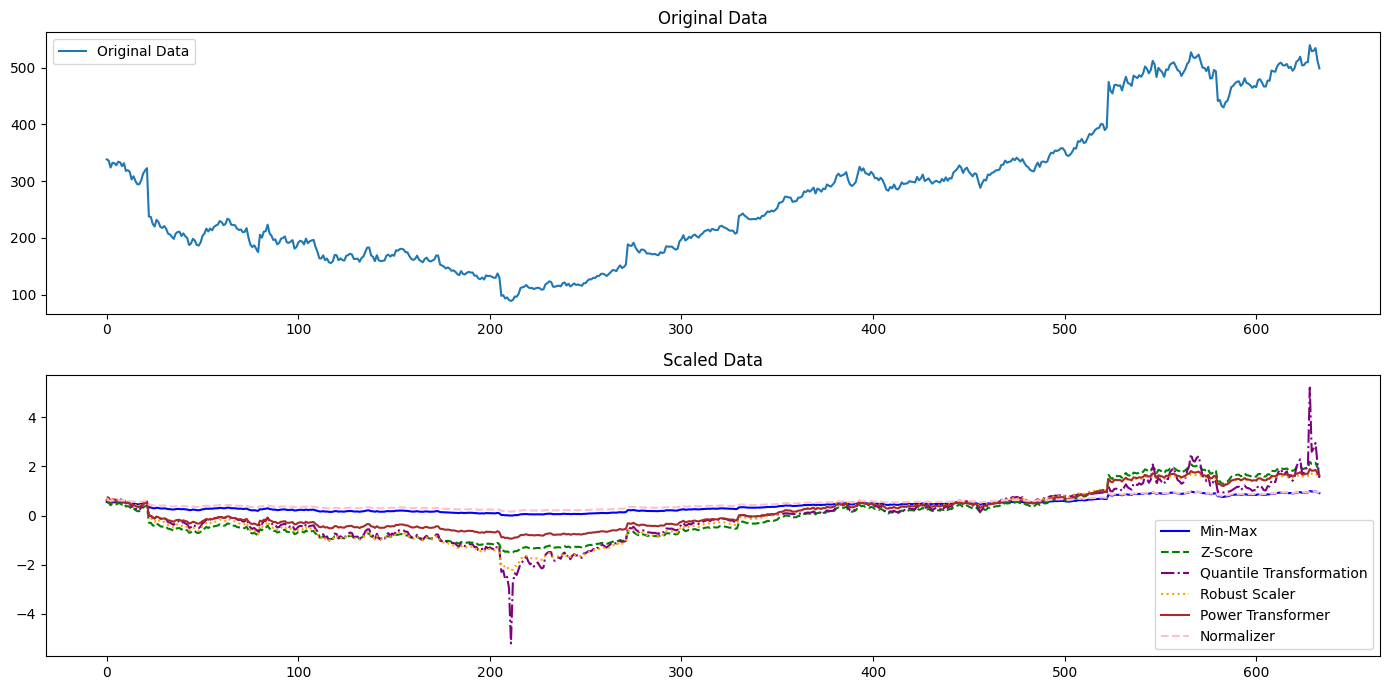

In [20]:
scaled_df = pd.DataFrame(scaled_data, columns=['Close'])
scaled_df2 = pd.DataFrame(scaled_Z_Score, columns=['Close'])
scaled_df3 = pd.DataFrame(scaled_quantile, columns=['Close'])
scaled_df4 = pd.DataFrame(scaled_power, columns=['Close'])
scaled_df5 = pd.DataFrame(scaled_RobustScaler, columns=['Close'])
scaled_df6 = pd.DataFrame(scaled_MaxAbs, columns=['Close'])

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(scaled_df, label='Min-Max', color='blue', linestyle='-')
plt.plot(scaled_df2, label='Z-Score', color='green', linestyle='--')
plt.plot(scaled_df3, label='Quantile Transformation',
         color='purple', linestyle='-.')
plt.plot(scaled_df4, label='Robust Scaler', color='orange', linestyle=':')
plt.plot(scaled_df5, label='Power Transformer', color='brown', linestyle='-')
plt.plot(scaled_df6, label='Normalizer', color='pink', linestyle='--')
plt.title('Scaled Data')
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_70667/226226971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = all_predictions_list[i]
/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_70667/226226971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = all_predictions_list[i]
/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_70667/226226971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

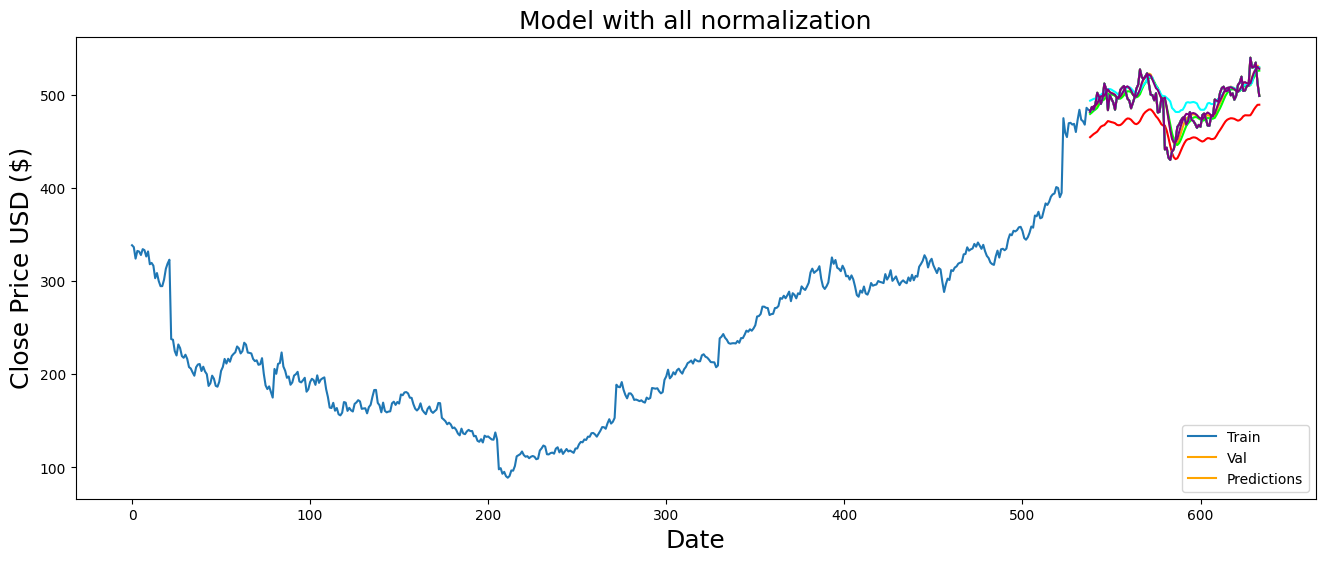

In [21]:
train1 = data[:training_data_len]
valid1 = data[training_data_len:]
colors = ['orange', 'red', 'lime', 'cyan', 'purple', 'brown']

plt.figure(figsize=(16, 6))
plt.title('Model with all normalization', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)  
plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
for i in range(len(all_predictions_list)-1):
    valid['Predictions'] = all_predictions_list[i]
    plt.plot(valid[['Close', 'Predictions']], colors[i])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_70667/1635867209.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = predictions


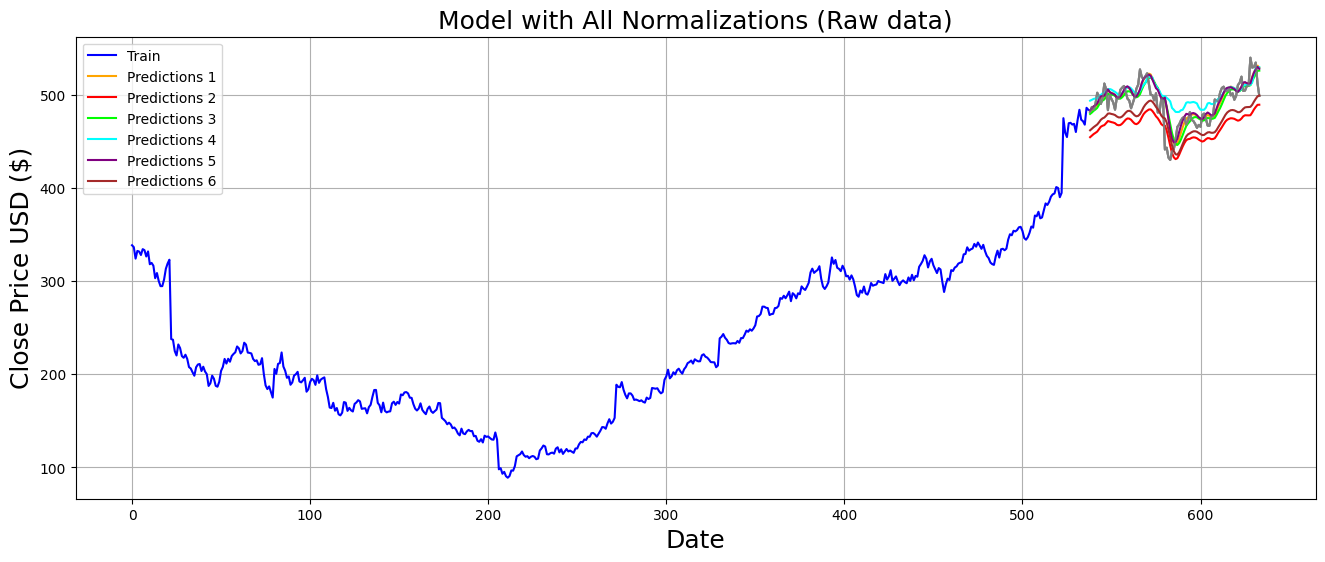

In [22]:
train1 = data[:training_data_len]
valid1 = data[training_data_len:]
    
plt.figure(figsize=(16, 6))
plt.title('Model with All Normalizations (Raw data)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
    
    # Plot the training data
plt.plot(train1['Close'], label='Train', color='blue')
    
colors = ['orange', 'red', 'lime', 'cyan', 'purple', 'brown']
for i, predictions in enumerate(all_predictions_list):
    valid1['Predictions'] = predictions
    plt.plot(valid1['Close'], color='gray', alpha=0.5)  # Plot the actual validation data
    plt.plot(valid1['Predictions'], label=f'Predictions {i+1}', color=colors[i % len(colors)])
    
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Report 

dataset: 538 data
train 478 ข้อมูล

LSTM Model

🔥train(with raw data)

1. Min-Max Normalization
RMSE: 6.165119805120682
Median Absolute Error (MAE): 3.4629364013671875

2. Z-Score Normalization
RMSE: 6.635036062852706
Median Absolute Error (MAE): 3.8307342529296875

3. Max Abs Scaling
RMSE: 11.782300010542874
Median Absolute Error (MAE): 9.60858154296875

4. quantile transformation
RMSE: 8.28128401352164
Median Absolute Error (MAE): 3.649993896484375

5. Robust Scaler
RMSE: 5.887000780993204
Median Absolute Error (MAE): 3.4169769287109375

6. PowerTransformer
RMSE: 6.690815007573578
Median Absolute Error (MAE): 3.805145263671875

Section EMA 

In [39]:
data1 = dataset.filter(['Close']).ewm(span=20, adjust=False).mean()
# training_data_len = int(np.ceil(len(data.values) * .95))
training_data_len1 = int(np.ceil(len(data1.values)) * .85)
all_predictions_list.clear()

[array([0.5686298 , 0.56815402, 0.56479786, 0.56372362, 0.56259311,
       0.56068971, 0.56045884, 0.55998721, 0.55795564, 0.55740049,
       0.55364349, 0.55058516, 0.54710089, 0.54077894, 0.53637044,
       0.53035559, 0.52360696, 0.51750343, 0.51365469, 0.51290647,
       0.5135882 , 0.51515184, 0.49638967, 0.47925579, 0.46087061,
       0.44311678, 0.42985167, 0.41691965, 0.4032025 , 0.39035384,
       0.37951   , 0.36864319, 0.35672119, 0.34556773, 0.33451074,
       0.32364755, 0.31598482, 0.30973358, 0.30420789, 0.29742369,
       0.29237919, 0.28659844, 0.28067942, 0.27234398, 0.26546991,
       0.26119387, 0.25654631, 0.25054241, 0.24487833, 0.2410319 ,
       0.2402976 , 0.24062976, 0.24297781, 0.2439187 , 0.24599138,
       0.24711158, 0.24957136, 0.25232947, 0.25524388, 0.25936487])]
[0.26261760737094164]
60

[array([0.5686298 , 0.56815402, 0.56479786, 0.56372362, 0.56259311,
       0.56068971, 0.56045884, 0.55998721, 0.55795564, 0.55740049,
       0.55364349, 0.55058516, 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.4785e-04 - val_loss: 0.0011
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.5096e-04 - val_loss: 0.0015
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.9848e-04 - val_loss: 5.2813e-04
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.6709e-04 - val_loss: 7.5722e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
RMSE: 16.059153308228865
Median Absolute Error (MAE): 16.131304940462655
R-Squared: -0.29694973497811783


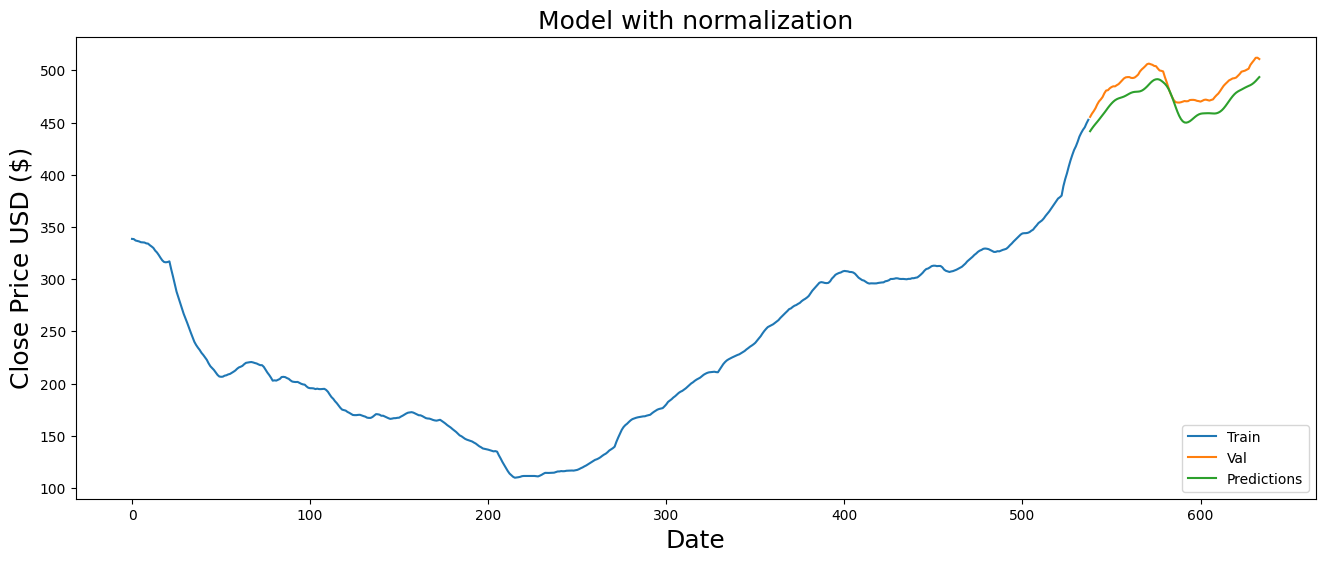

In [40]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler1.fit_transform(data1.values)
x_train_MinMax = []
y_train_MinMax = []
x_test_MinMax = []
modelMinMax = Sequential()

visualizeTrain(scaled_data1, x_train_MinMax,
               y_train_MinMax, modelMinMax, training_data_len1)
Evaluation(scaled_data1, scaler1, xtest=x_test_MinMax,
           training_data=training_data_len1, data=data1, model=modelMinMax)

#RMSE: 3.8463532843199926
#Median Absolute Error (MAE): 3.3789286138343755

[array([ 0.58011842,  0.57848802,  0.56698726,  0.56330612,  0.55943212,
        0.55290963,  0.55211849,  0.55050235,  0.54354062,  0.54163825,
        0.52876393,  0.51828378,  0.50634399,  0.48468021,  0.46957333,
        0.44896187,  0.42583593,  0.40492059,  0.3917319 ,  0.38916793,
        0.39150406,  0.39686226,  0.33256882,  0.2738551 ,  0.21085352,
        0.1500154 ,  0.10455904,  0.06024409,  0.01323872, -0.03079055,
       -0.06794981, -0.10518777, -0.14604158, -0.18426182, -0.22215148,
       -0.25937703, -0.28563538, -0.30705686, -0.32599208, -0.34923991,
       -0.36652622, -0.38633545, -0.4066185 , -0.43518204, -0.45873785,
       -0.47339081, -0.48931688, -0.50989083, -0.52930027, -0.54248105,
       -0.54499733, -0.54385908, -0.53581289, -0.53258869, -0.5254861 ,
       -0.52164746, -0.51321836, -0.50376697, -0.49378002, -0.47965836])]
[-0.4685120090684066]
60

[array([ 0.58011842,  0.57848802,  0.56698726,  0.56330612,  0.55943212,
        0.55290963,  0.55211849,  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0407 - val_loss: 0.0413
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0031 - val_loss: 0.0250
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0020 - val_loss: 0.0320
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0019 - val_loss: 0.0262
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0010 - val_loss: 0.0263
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
RMSE: 55.43999376896534
Median Absolute Error (MAE): 56.106445205190056
R-Squared: -14.456964238195159


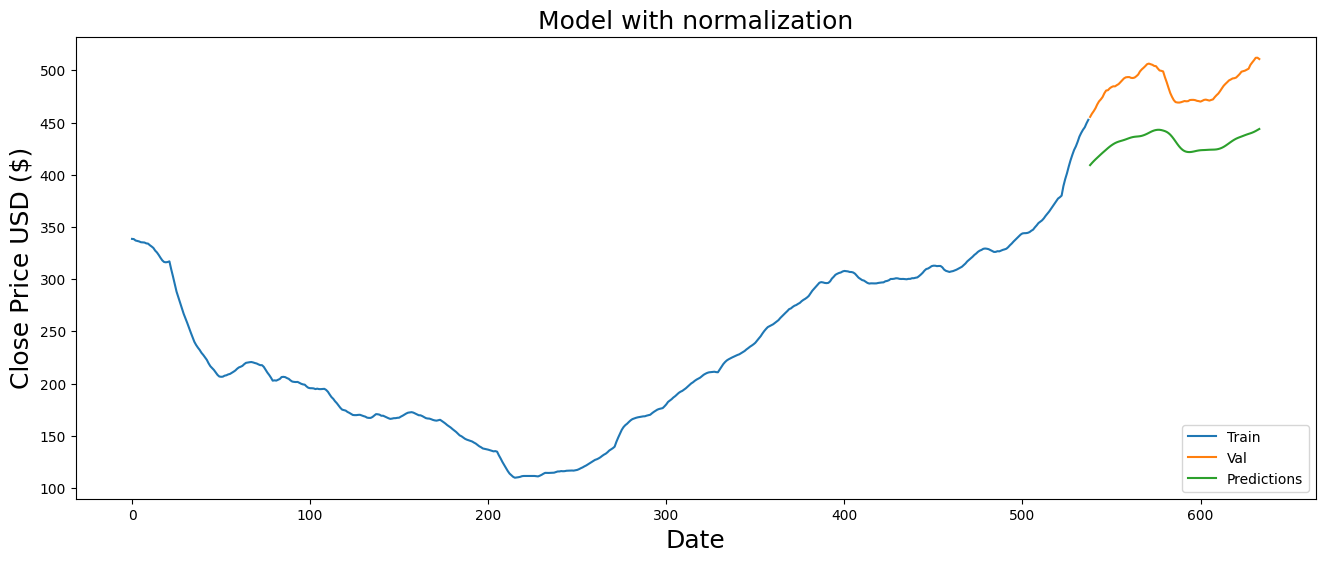

In [41]:
# Z-Score Normalization
scalerZScore = StandardScaler()
# scaled_Z_Score = scalerZScore.fit_transform(data.values)
scaled_Z_Score = scalerZScore.fit_transform(data1.values)

x_train_Z = []
y_train_Z = []
x_test_Z = []
modelZ1 = Sequential()

visualizeTrain(scaled_Z_Score, x_train_Z, y_train_Z, modelZ1, training_data_len1)
Evaluation(scaled_Z_Score, scalerZScore, xtest=x_test_Z, 
           training_data=training_data_len1, data=data1, model=modelZ1)
#RMSE: 3.1282552618485857
#Median Absolute Error (MAE): 1.8592423017175577

[array([0.66108149, 0.66070768, 0.65807081, 0.65722681, 0.65633859,
       0.65484313, 0.65466174, 0.65429119, 0.65269502, 0.65225885,
       0.64930706, 0.6469042 , 0.64416667, 0.63919966, 0.63573599,
       0.63101024, 0.62570799, 0.62091257, 0.6178887 , 0.61730084,
       0.61783646, 0.61906498, 0.60432394, 0.5908622 , 0.57641736,
       0.56246855, 0.55204643, 0.54188601, 0.53110873, 0.52101381,
       0.51249403, 0.50395621, 0.49458935, 0.4858263 , 0.47713906,
       0.46860408, 0.46258363, 0.45767216, 0.45333075, 0.44800054,
       0.44403718, 0.43949537, 0.43484492, 0.42829594, 0.42289513,
       0.41953554, 0.41588405, 0.4111669 , 0.40671675, 0.4036947 ,
       0.40311777, 0.40337875, 0.40522356, 0.40596279, 0.40759126,
       0.40847137, 0.41040397, 0.41257096, 0.41486075, 0.41809853])]
[0.42065413406256186]
60

[array([0.66108149, 0.66070768, 0.65807081, 0.65722681, 0.65633859,
       0.65484313, 0.65466174, 0.65429119, 0.65269502, 0.65225885,
       0.64930706, 0.6469042 , 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0159 - val_loss: 4.2702e-04
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.7452e-04 - val_loss: 0.0013
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 2.3980e-04 - val_loss: 6.1271e-04
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.4384e-04 - val_loss: 8.1599e-04
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 2.1202e-04 - val_loss: 5.7405e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
RMSE: 10.07751594672201
Median Absolute Error (MAE): 9.665298640475925
R-Squared: 0.48927767236223596


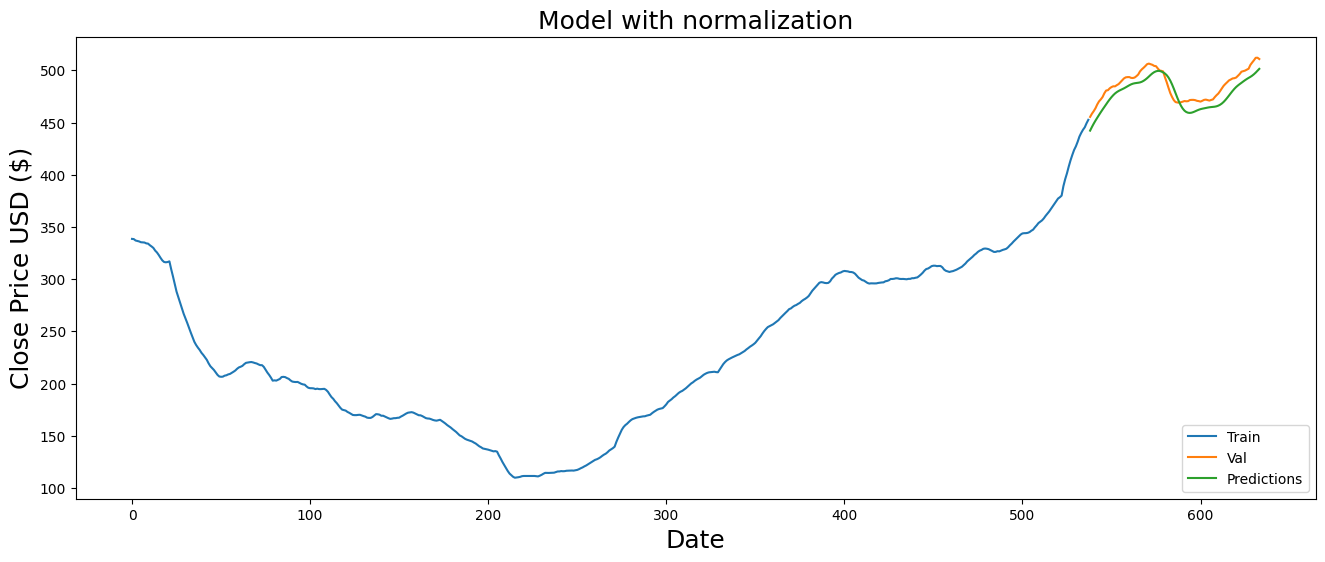

In [42]:
# Max Abs Scaling
scalerMaxAbs = MaxAbsScaler()
scaled_MaxAbs = scalerMaxAbs.fit_transform(data1.values)

x_train_MaxAbs = []
y_train_MaxAbs = []
x_test_MaxAbs = []
modelMaxAbs1 = Sequential()

visualizeTrain(scaled_MaxAbs, x_train_MaxAbs,
               y_train_MaxAbs, modelMaxAbs1, training_data_len1)
Evaluation(scaled_MaxAbs, scalerMaxAbs, xtest=x_test_MaxAbs,
           training_data=training_data_len1, data=data1, model=modelMaxAbs1)

[array([0.7835703 , 0.78199052, 0.77883096, 0.77725118, 0.77567141,
       0.77251185, 0.77093207, 0.76935229, 0.76777251, 0.76461295,
       0.76303318, 0.75987362, 0.75671406, 0.74091627, 0.72669826,
       0.72195893, 0.71879937, 0.71406003, 0.7093207 , 0.70616114,
       0.70774092, 0.71248025, 0.68088468, 0.63981043, 0.57030016,
       0.56240126, 0.55766193, 0.54976303, 0.54028436, 0.53238547,
       0.52606635, 0.51974724, 0.51184834, 0.507109  , 0.50236967,
       0.49763033, 0.492891  , 0.48815166, 0.48341232, 0.47867299,
       0.47393365, 0.46761453, 0.46129542, 0.44707741, 0.43443918,
       0.42654028, 0.42022117, 0.40600316, 0.39336493, 0.38546603,
       0.38230648, 0.38388626, 0.38862559, 0.39020537, 0.39652449,
       0.39810427, 0.40126382, 0.41548183, 0.41864139, 0.42496051])]
[0.42812006319115326]
60

[array([0.7835703 , 0.78199052, 0.77883096, 0.77725118, 0.77567141,
       0.77251185, 0.77093207, 0.76935229, 0.76777251, 0.76461295,
       0.76303318, 0.75987362, 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (634). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0074 - val_loss: 0.0039
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0011 - val_loss: 3.7404e-04
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 6.3035e-04 - val_loss: 0.0032
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 7.0102e-04 - val_loss: 1.4054e-04
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.4237e-04 - val_loss: 1.5079e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
RMSE: 5.212087416034722
Median Absolute Error (MAE): 2.3123886194956924
R-Squared: 0.8633841028252643


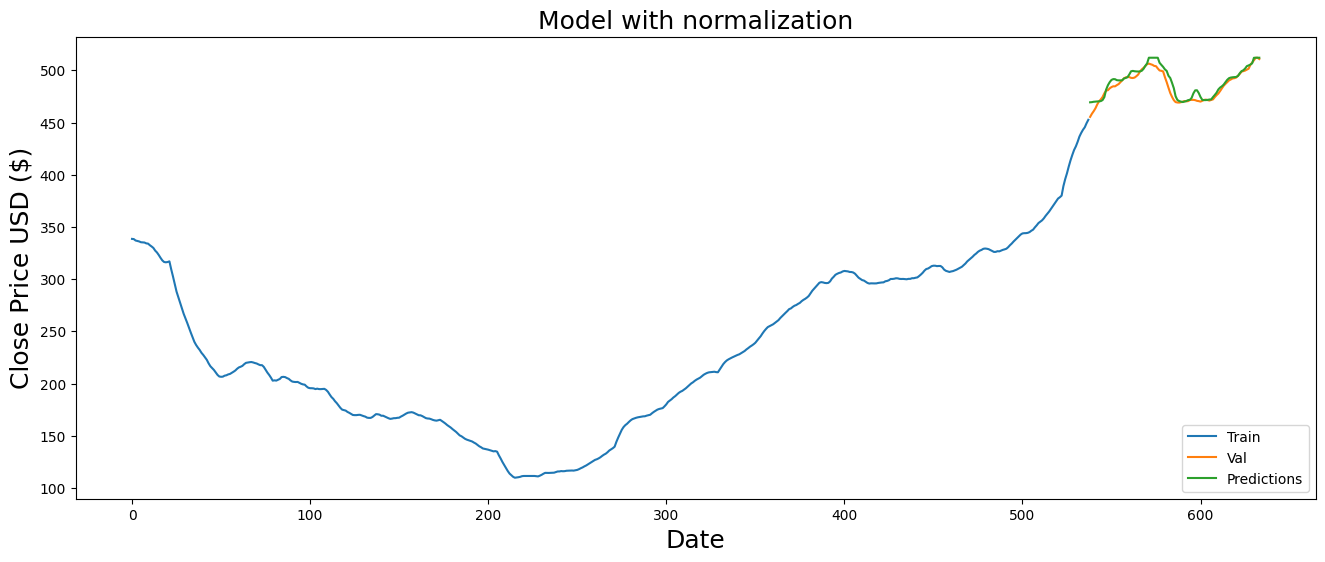

In [43]:
# quantile transformation
scalerQuantile = QuantileTransformer()
scaled_quantile = scalerQuantile.fit_transform(data1.values)

x_train_Quantile = []
y_train_Quantile = []
x_test_Quantile = []
modelQuantile1 = Sequential()

visualizeTrain(scaled_quantile, x_train_Quantile,
               y_train_Quantile, modelQuantile1, training_data_len1)
Evaluation(scaled_quantile, scalerQuantile, xtest=x_test_Quantile,
           training_data=training_data_len1, data=data1, model=modelQuantile1)

[array([ 0.6070581 ,  0.60585161,  0.59734105,  0.59461701,  0.59175025,
        0.58692361,  0.58633817,  0.58514223,  0.57999055,  0.5785828 ,
        0.56905581,  0.5613005 ,  0.55246507,  0.53643389,  0.5252548 ,
        0.51000233,  0.49288916,  0.47741182,  0.4676522 ,  0.46575486,
        0.4674836 ,  0.47144866,  0.42387155,  0.38042344,  0.33380231,
        0.28878215,  0.25514447,  0.22235143,  0.18756749,  0.15498586,
        0.12748803,  0.09993197,  0.06970017,  0.04141722,  0.0133789 ,
       -0.01416799, -0.03359915, -0.04945103, -0.06346308, -0.08066646,
       -0.09345831, -0.10811713, -0.12312658, -0.14426358, -0.16169487,
       -0.17253804, -0.18432333, -0.19954804, -0.21391101, -0.22366478,
       -0.22552682, -0.22468452, -0.21873034, -0.21634444, -0.21108852,
       -0.20824794, -0.20201041, -0.19501639, -0.18762604, -0.17717603])]
[-0.1689277347998066]
60

[array([ 0.6070581 ,  0.60585161,  0.59734105,  0.59461701,  0.59175025,
        0.58692361,  0.58633817,  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0242 - val_loss: 0.0088
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0013 - val_loss: 0.0091
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0011 - val_loss: 0.0078
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 9.5068e-04 - val_loss: 0.0025
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0015 - val_loss: 0.0019
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
RMSE: 13.951619389074905
Median Absolute Error (MAE): 13.860721294601376
R-Squared: 0.021125317150477274


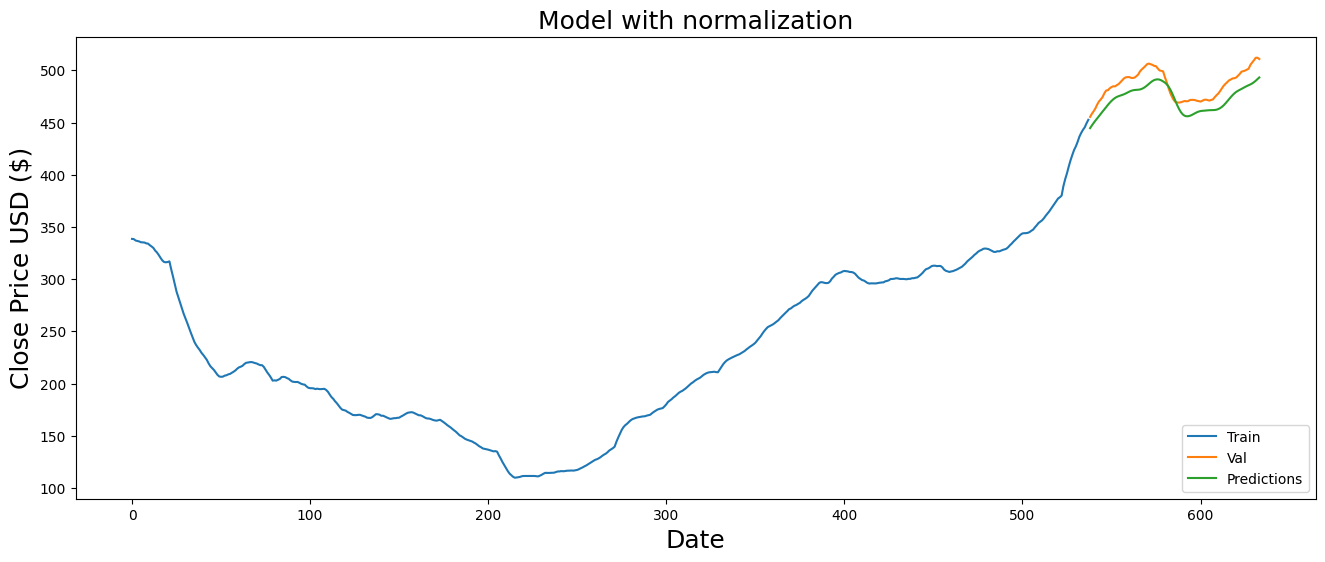

In [44]:
# Robust Scaler
scalerRobust = RobustScaler()
scaled_RobustScaler = scalerRobust.fit_transform(data1.values)

x_train_Robust = []
y_train_Robust = []
x_test_Robust = []
modelRobust1 = Sequential()

visualizeTrain(scaled_RobustScaler, x_train_Robust,
               y_train_Robust, modelRobust1, training_data_len1)
Evaluation(scaled_RobustScaler, scalerRobust, xtest=x_test_Robust,
           training_data=training_data_len1, data=data1, model=modelRobust1)

[array([ 0.72758187,  0.72628795,  0.71713997,  0.7142042 ,  0.71111057,
        0.70589256,  0.70525884,  0.70396374,  0.69837656,  0.69684745,
        0.68647232,  0.67799194,  0.66829221,  0.6505878 ,  0.63816083,
        0.62109682,  0.6017993 ,  0.58420596,  0.57304251,  0.57086596,
        0.57284918,  0.5773915 ,  0.52228719,  0.47078583,  0.41421048,
        0.35822512,  0.31548702,  0.27304356,  0.22715069,  0.18331682,
        0.14566119,  0.10729704,  0.0644582 ,  0.0236453 , -0.0175424 ,
       -0.0587396 , -0.08824994, -0.11260811, -0.13435615, -0.16134188,
       -0.18161491, -0.20506874, -0.2293341 , -0.26394596, -0.2928871 ,
       -0.31107559, -0.331009  , -0.35701837, -0.38182836, -0.39883062,
       -0.40209078, -0.40061545, -0.39021345, -0.38605843, -0.37693174,
       -0.37201421, -0.36125279, -0.34924584, -0.3366263 , -0.31889958])]
[-0.3050036173694408]
60

[array([ 0.72758187,  0.72628795,  0.71713997,  0.7142042 ,  0.71111057,
        0.70589256,  0.70525884,  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0545 - val_loss: 0.0047
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0085 - val_loss: 0.0037
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0029 - val_loss: 0.0048
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0028 - val_loss: 0.0111
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0024 - val_loss: 0.0026
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
RMSE: 21.76178403211309
Median Absolute Error (MAE): 22.352195879497458
R-Squared: -1.3815891795387376


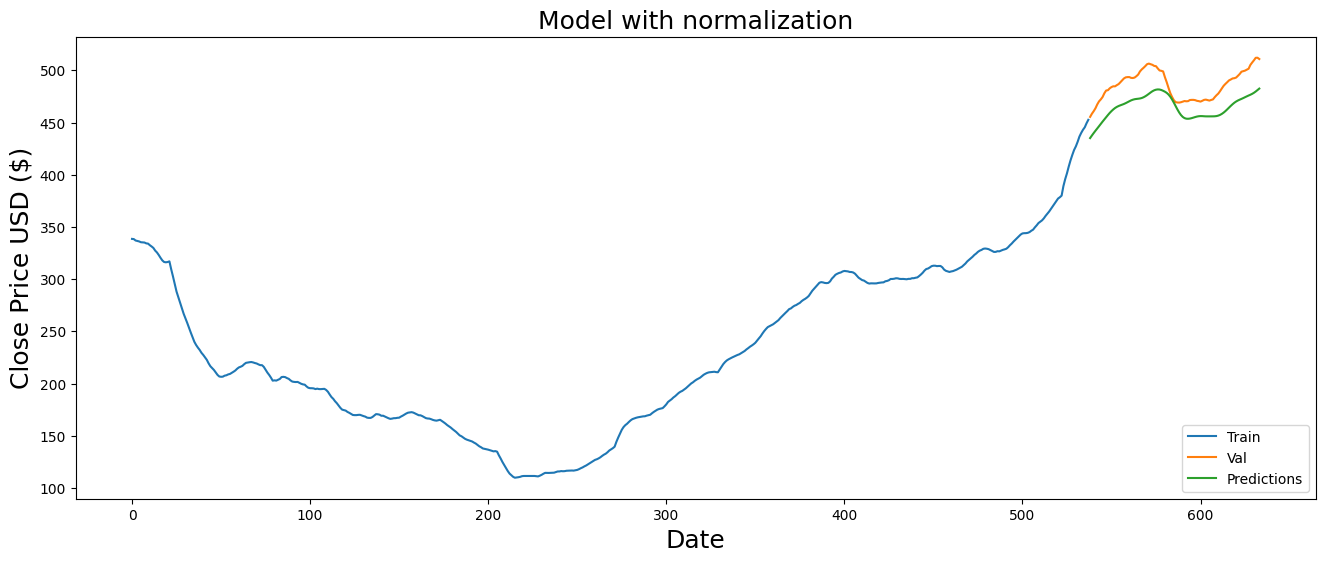

In [45]:
scalerPower = PowerTransformer(method='yeo-johnson')
scaled_power = scalerPower.fit_transform(data1.values)

x_train_Power = []
y_train_Power = []
x_test_Power = []
modelPower1 = Sequential()

visualizeTrain(scaled_power, x_train_Power,
               y_train_Power, modelPower1, training_data_len)
Evaluation(scaled_power, scalerPower, xtest=x_test_Power,
           training_data=training_data_len1, data=data1, model=modelPower1)

/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_70667/80350820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = np.nan
/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_70667/80350820.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = predictions


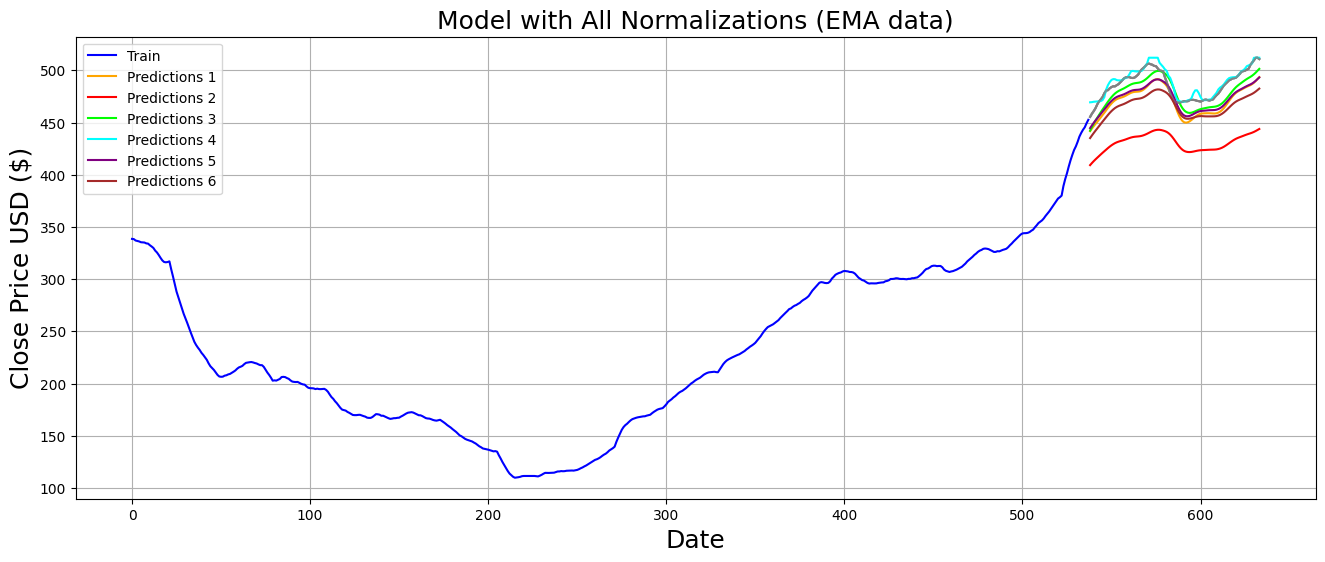

In [46]:
dataset['EMA'] = dataset['Close'].ewm(span=20, adjust=False).mean()

# Split the data into training and validation sets
train1 = dataset[:training_data_len1]
valid1 = dataset[training_data_len1:]
valid1['Predictions'] = np.nan

plt.figure(figsize=(16, 6))
plt.title('Model with All Normalizations (EMA data)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data with EMA
plt.plot(train1['EMA'], label='Train', color='blue')

colors = ['orange', 'red', 'lime', 'cyan', 'purple', 'brown']

for i, predictions in enumerate(all_predictions_list):
    #valid1['Predictions'] = predictions
    predictions = np.array(predictions)
    if len(predictions) > len(valid1):
        predictions = predictions[:len(valid1)]
    elif len(predictions) < len(valid1):
        predictions = np.pad(predictions, (0, len(
            valid1) - len(predictions)), 'constant', constant_values=np.nan)
    valid1['Predictions'] = predictions
    # Plot the actual validation data with EMA
    plt.plot(valid1['EMA'], color='gray', alpha=0.5)
    plt.plot(valid1['Predictions'], label=f'Predictions {i+1}', color=colors[i % len(colors)])

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Report 

dataset: 538 data
train 478 ข้อมูล

LSTM Model

🔥train(with EMA data)

1. Min-Max Normalization
RMSE: 2.4937740914124293
Median Absolute Error (MAE): 2.153193195232035

2. Z-Score Normalization
RMSE: 3.1600108786992727
Median Absolute Error (MAE): 1.4888245468952164

3. Max Abs Scaling
RMSE: 5.7425514794266235
Median Absolute Error (MAE): 2.95393078681289

4. quantile transformation
RMSE: 1.6630784870558561
Median Absolute Error (MAE): 1.1893244487996526

5. Robust Scaler
RMSE: 1.7242712336164912
Median Absolute Error (MAE): 1.1533978634525113

6. PowerTransformer
RMSE: 2.2285651404034157
Median Absolute Error (MAE): 0.9683106340968095